1) Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?
__________________________________________________________________________________________________
A) The proposal to predict credit card approval is highly relevant in today's world due to the increasing use of credit cards as a financial tool. With the rise in e-commerce and online transactions, credit cards have become a primary payment method for many individuals, making it essential for banks to efficiently process credit card applications and improve the approval rate. Predicting a good client is essential for a bank because it helps to minimize the risk of credit default and reduce the cost of managing credit card accounts. Banks can use machine learning algorithms to analyze various factors such as income level, employment status etc. By accurately predicting, banks can offer credit cards to clients with lower risk profiles, which can ultimately lead to better profitability and improved customer satisfaction.

2) How is it going to impact the banking sector?
______________________________________________________________________________________________________
A) predicting credit card approval using machine learning can have a transformative impact on the banking sector by improving the customer experience, reducing risk, and increasing profitability.

Improved customer experience: By using predictive models, banks can offer faster and more accurate credit card approvals, which can improve the overall customer experience. This can lead to increased customer satisfaction and loyalty.

Reduced risk of credit defaults: Machine learning algorithms can help banks to accurately predict the likelihood of a client defaulting on their credit card payments. By identifying clients with lower credit risk profiles, banks can offer credit cards with lower interest rates, which can reduce the risk of defaults and ultimately improve the bank's profitability.

Improved profitability: By reducing the risk of credit defaults and improving the efficiency of the underwriting process, banks can increase their profitability. This can help banks to offer better rates and benefits to their clients, leading to increased market share and revenue.

3) If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India ?
______________________________________________________________________________________________________
A) If there is a gap in the knowledge or process used by a bank in India for credit card approval, the proposed method can be helpful for banks in India by improving the accuracy of credit card approval predictions, enhancing credit risk management strategies, and improving efficiency. However, to fully leverage the benefits of our proposed method, banks will need to ensure that they have access to reliable and comprehensive data sources.

* Systamatic approach:
____________________________________________________________________________________________________
* There 6 phases, namely (Cross-industry standard process), Business Understanding, Data
  Understanding, Data Preparation, Modeling, Evaluation and deployment.

In [1]:
#Importing necessarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the data set Credit_card
df=pd.read_csv("Credit_card.csv")

#loading the data set Credit_card_label
df1=pd.read_csv("Credit_card_label.csv")

# getting top five records
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [3]:
# getting top five records
df1.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [4]:
#merging the Both data set of Credit_card_label and Credit_card.
df2=pd.merge(df,df1,on="Ind_ID")
df2.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
# renaming the column names 
df2 = df2.rename(columns={'Ind_ID':'Ind_id', 'GENDER': 'Gender', 'CHILDREN': 'Children', 'EDUCATION': 'Education', 'EMAIL_ID':'Email_id','Birthday_count': 'Age','Employed_days':'Employed_exp'})

In [6]:
# supports the statistical analysis like mean, median , mode
df2.describe()  

,Ind_id,Children,Annual_income,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [7]:
#Display number of rows, columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employed_exp     1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_id         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [8]:
# shape Finding rows and columns
df2.shape

(1548, 19)

# Data cleaning

In [9]:
# finding out the null values
df2.isnull().sum()

Ind_id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income       23
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                 22
Employed_exp         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_id             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

<Axes: >

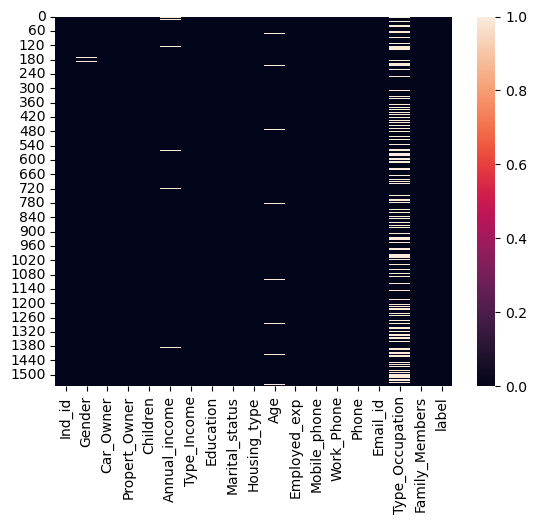

In [10]:
#Missing Data Analysis
# Identify and visualize missing data 
sns.heatmap(df2.isnull())

In [11]:
# Imputing the null values with mean values
df2.fillna(df2.mean(numeric_only=True), inplace=True) 

In [12]:
# replace missing values
df2['Type_Occupation'].fillna('other',inplace=True)

In [13]:
# Deleting the null values in the Gender column
df2=df2.dropna(subset=["Gender"])

In [14]:
df2.head(6)

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
6,5009754,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1


In [15]:
# converting the negative values to actual age
df2['Age']=abs(round((df2['Age']/-365),0))
# converting negative values to exprience of the employee
df2['Employed_exp']=abs(round((df2['Employed_exp']/-365),0))

In [16]:
# replacing the extreme values with zero.
df2['Employed_exp'].replace(1001.0, 0,inplace=True)

In [17]:
df2.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


In [18]:
df2.isnull().sum()

Ind_id             0
Gender             0
Car_Owner          0
Propert_Owner      0
Children           0
Annual_income      0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Age                0
Employed_exp       0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_id           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [19]:
# Save the cleaned and analyzed DataFrame to a CSV file
df2.to_csv("final_project1.csv", index=False)

# Load the saved CSV file into a new DataFrame
df = pd.read_csv("final_project1.csv")

# Check for missing values in the new DataFrame
missing_values = df.isnull().sum()
print(missing_values)

Ind_id             0
Gender             0
Car_Owner          0
Propert_Owner      0
Children           0
Annual_income      0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Age                0
Employed_exp       0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_id           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64


In [20]:
# shape dataframe
df.shape
# there are 1541 rows and 19 cols

(1541, 19)

In [21]:
df.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


In [22]:
# data types info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1541 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1541 non-null   object 
 3   Propert_Owner    1541 non-null   object 
 4   Children         1541 non-null   int64  
 5   Annual_income    1541 non-null   float64
 6   Type_Income      1541 non-null   object 
 7   Education        1541 non-null   object 
 8   Marital_status   1541 non-null   object 
 9   Housing_type     1541 non-null   object 
 10  Age              1541 non-null   float64
 11  Employed_exp     1541 non-null   float64
 12  Mobile_phone     1541 non-null   int64  
 13  Work_Phone       1541 non-null   int64  
 14  Phone            1541 non-null   int64  
 15  Email_id         1541 non-null   int64  
 16  Type_Occupation  1541 non-null   object 
 17  Family_Members

In [23]:
# statistical analysis mean, max., min, count,std, percentiles.
df.describe()

,Ind_id,Children,Annual_income,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,label
count,1.541000e+03,1541.000000,1.541000e+03,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,5.078979e+06,0.413368,1.908057e+05,43.974692,6.075276,1.0,0.208306,0.308241,0.092148,2.162232,0.110318
std,4.167137e+04,0.777811,1.121136e+05,11.517294,6.599256,0.0,0.406229,0.461917,0.289329,0.948492,0.313387
min,5.008827e+06,0.000000,3.375000e+04,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045113e+06,0.000000,1.215000e+05,34.000000,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078924e+06,0.000000,1.710000e+05,43.000000,4.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115671e+06,1.000000,2.250000e+05,53.000000,9.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,68.000000,41.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


# Exploratory Data Analysis

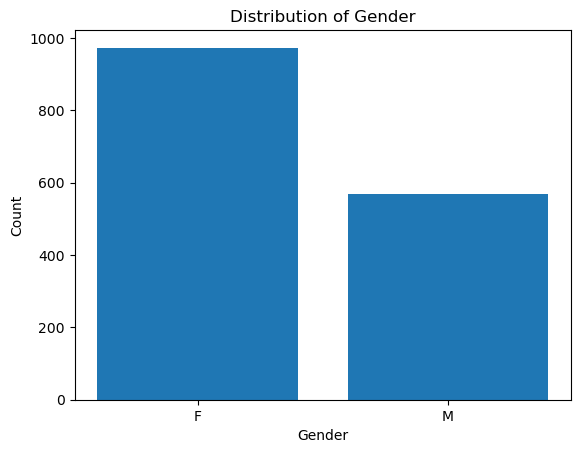

In [24]:
# count number of males and females 
gender_count=df['Gender'].value_counts()
#creat barpolt using Matplotlib
plt.bar(gender_count.index,gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

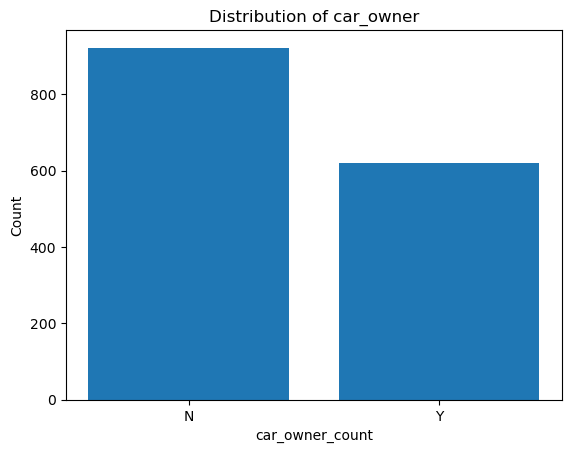

In [25]:
# count number of car owner
car_owner_count=df['Car_Owner'].value_counts()
#creat barpolt using Matplotlib
plt.bar(car_owner_count.index,car_owner_count.values)
plt.xlabel('car_owner_count')
plt.ylabel('Count')
plt.title('Distribution of car_owner')
plt.show()

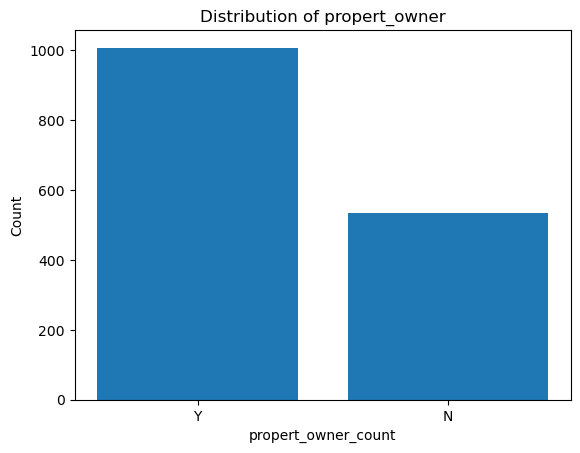

In [26]:
# count number of propert_owner
propert_owner_count=df['Propert_Owner'].value_counts()
#creat barpolt using Matplotlib
plt.bar(propert_owner_count.index,propert_owner_count.values)
plt.xlabel('propert_owner_count')
plt.ylabel('Count')
plt.title('Distribution of propert_owner')
plt.show()


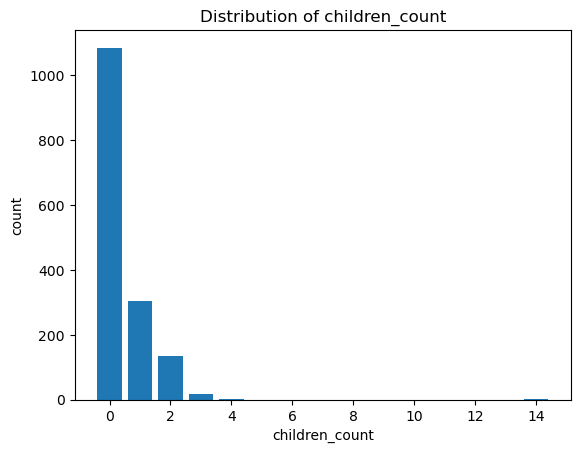

In [27]:
# count number of children
children_count=df['Children'].value_counts()
#creat barpolt using Matplotlib
plt.bar(children_count.index,children_count.values)
plt.xlabel('children_count')
plt.ylabel('count')
plt.title('Distribution of children_count')
plt.show()

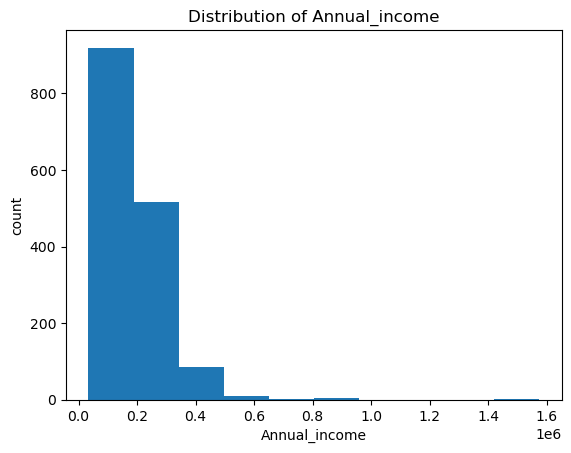

In [28]:
# histograph on Annual_income
plt.hist(df['Annual_income'], bins=10)
plt.xlabel('Annual_income')
plt.ylabel('count')
plt.title('Distribution of Annual_income')
plt.show()

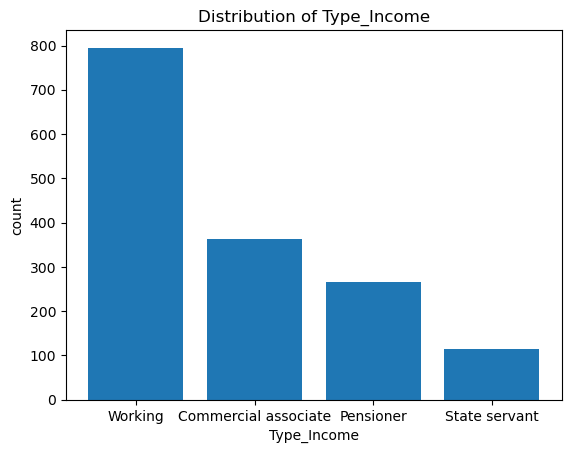

In [29]:
# count number of Type_Income
Type_Income_count=df['Type_Income'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Type_Income_count.index,Type_Income_count.values)
plt.xlabel('Type_Income')
plt.ylabel('count')
plt.title('Distribution of Type_Income')
plt.show()

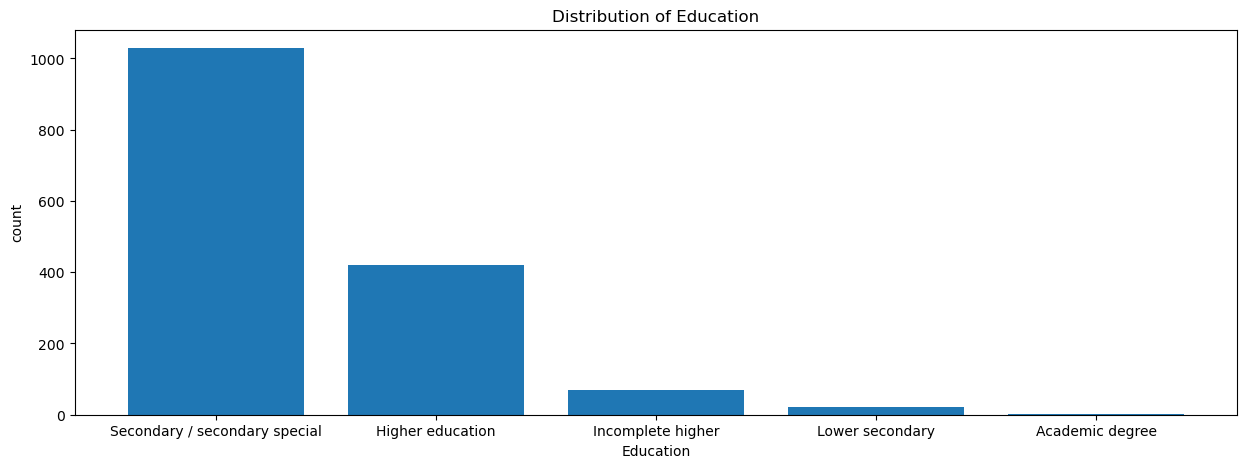

In [30]:
# count number of Education
Education_count=df['Education'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Education_count.index,Education_count.values)
plt.xlabel('Education')
plt.ylabel('count')
plt.title('Distribution of Education')
plt.show()

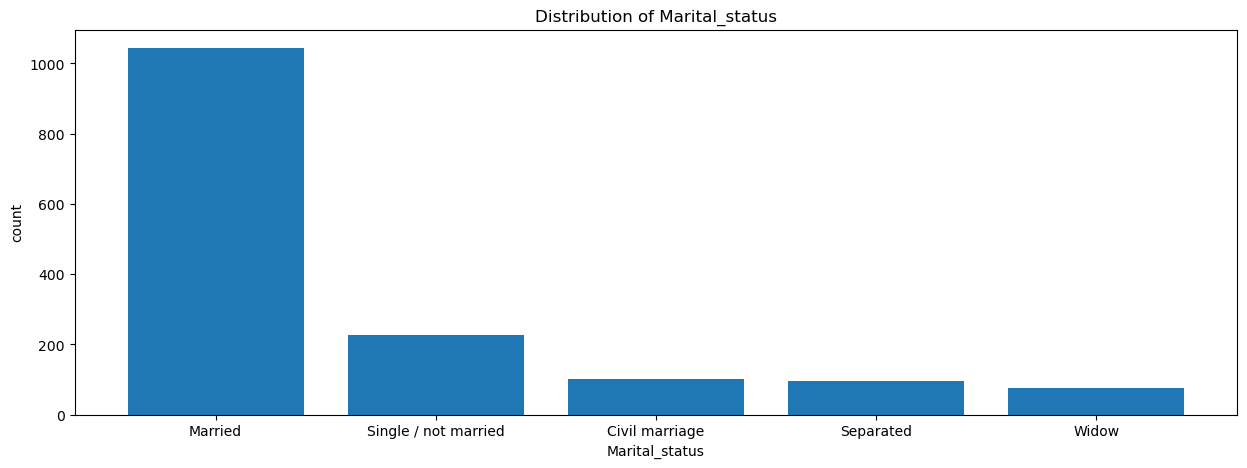

In [31]:
# count number of Marital_status
Marital_status_count=df['Marital_status'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Marital_status_count.index,Marital_status_count.values)
plt.xlabel('Marital_status')
plt.ylabel('count')
plt.title('Distribution of Marital_status')
plt.show()

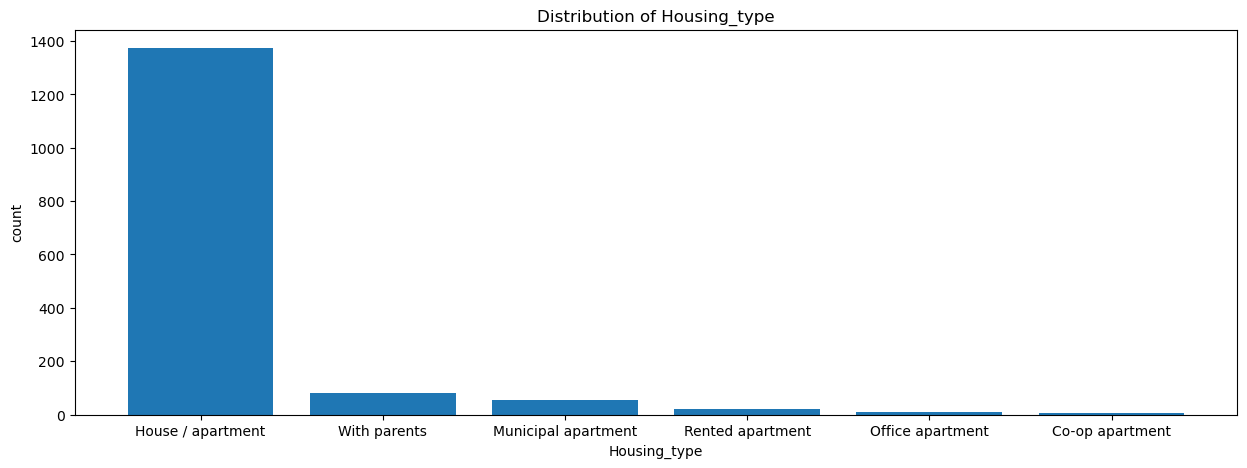

In [32]:
# count number of Housing_type
Housing_type_count=df['Housing_type'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Housing_type_count.index,Housing_type_count.values)
plt.xlabel('Housing_type')
plt.ylabel('count')
plt.title('Distribution of Housing_type')
plt.show()

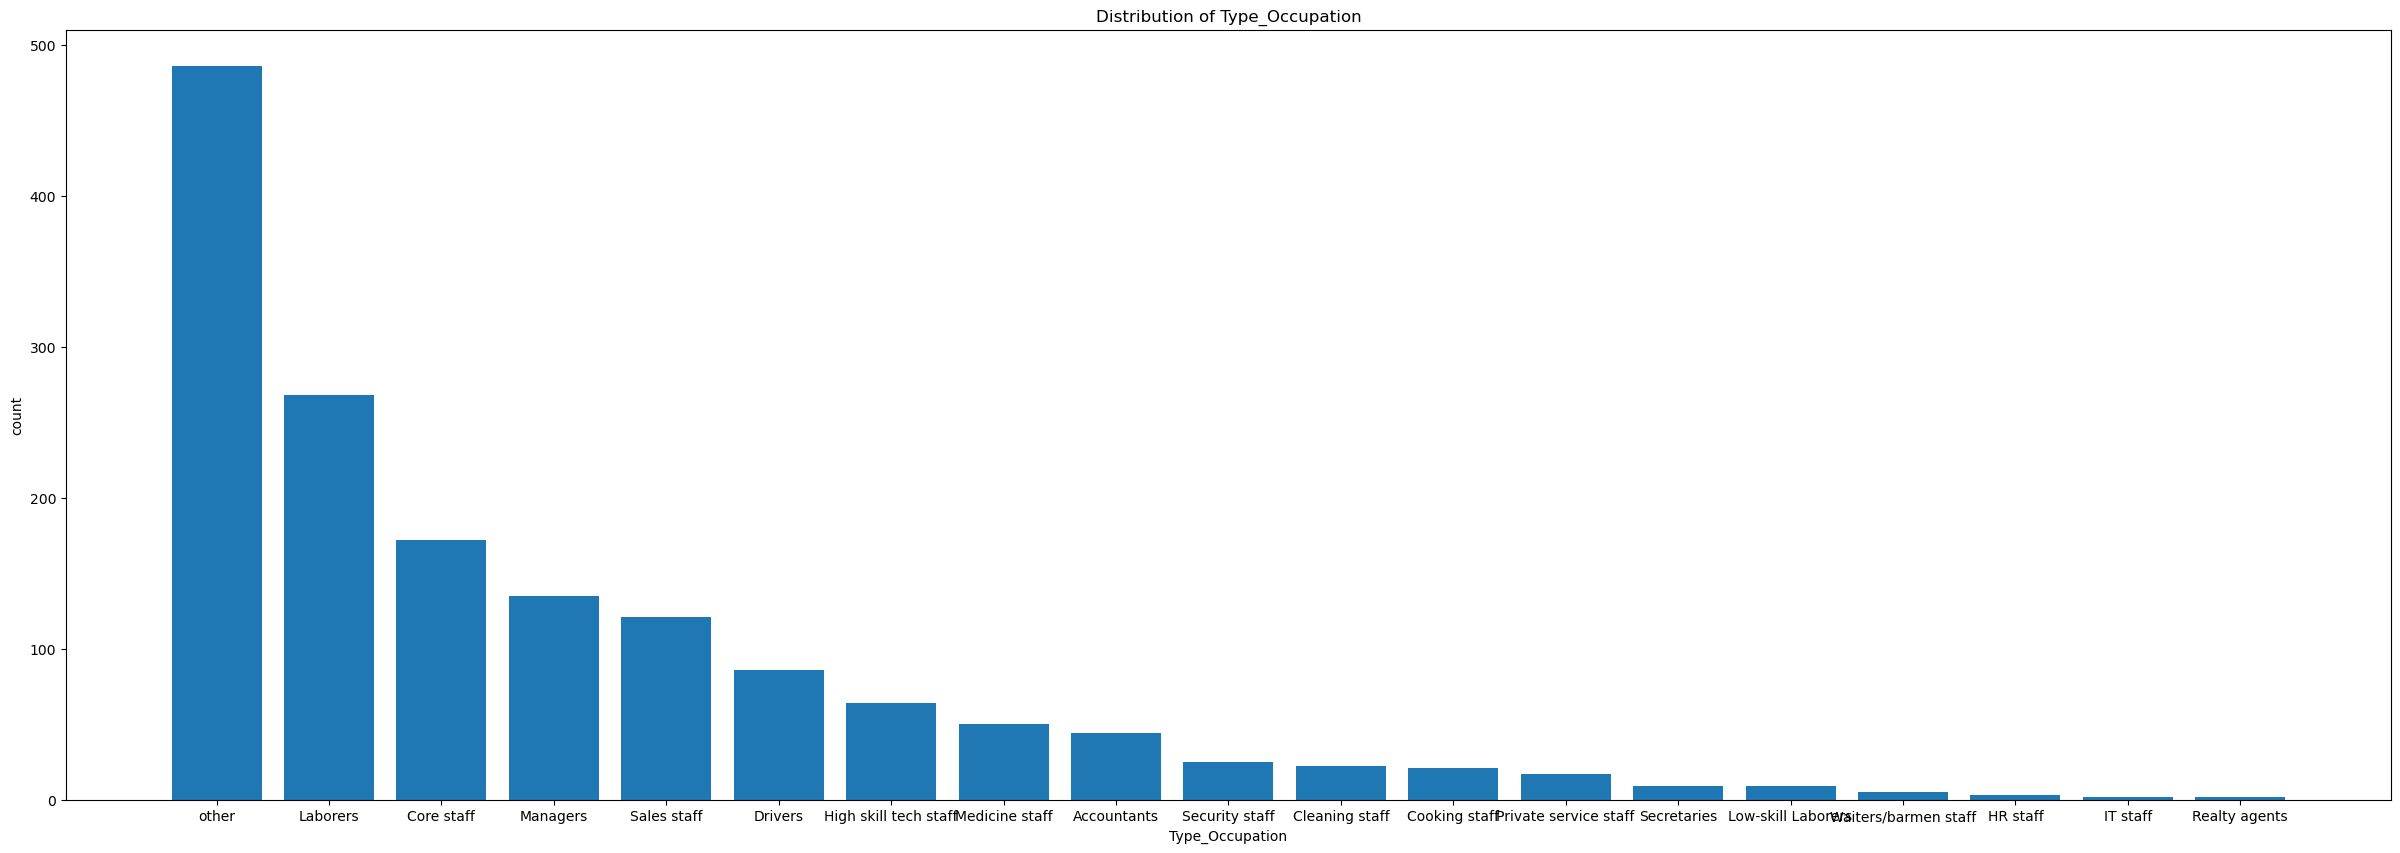

In [33]:
# count number of Type_Occupation
Type_Occupation_count=df2['Type_Occupation'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(30,10))
plt.bar(Type_Occupation_count.index,Type_Occupation_count.values)
plt.xlabel('Type_Occupation')
plt.ylabel('count')
plt.title('Distribution of Type_Occupation')
plt.show()

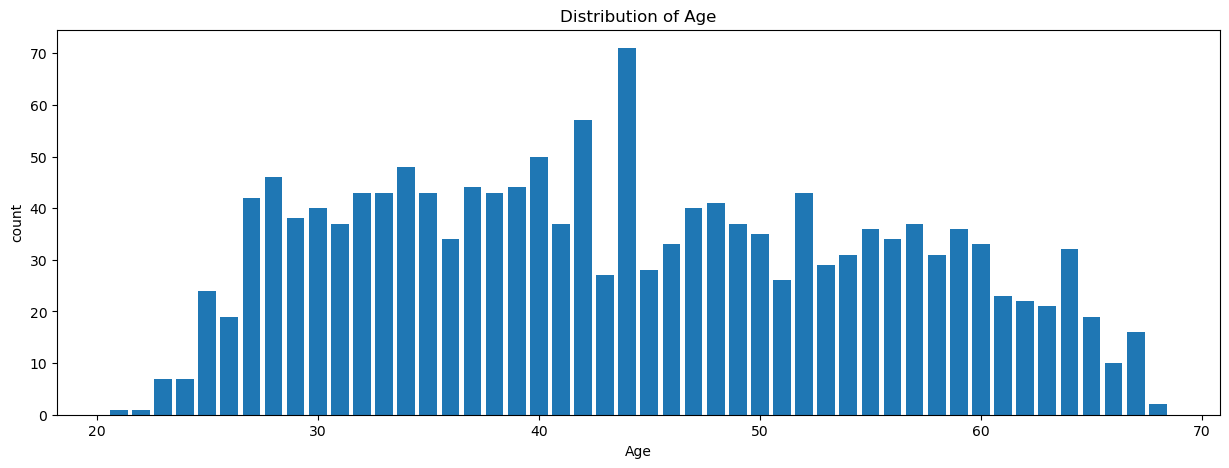

In [34]:
# count number of Birthday_count
Birthday_count=df['Age'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Birthday_count.index,Birthday_count.values)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age')
plt.show()

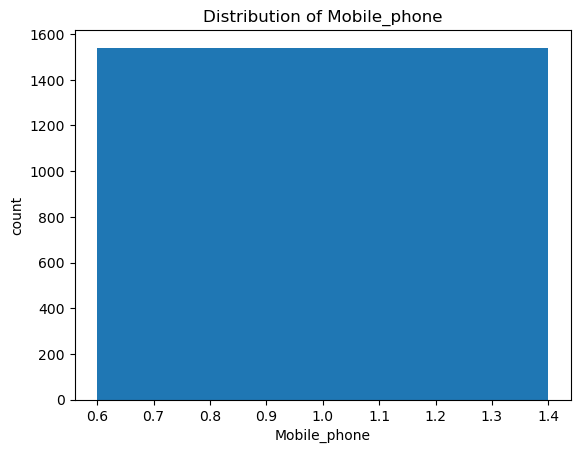

In [35]:
# count number of Mobile_phone
Mobile_phone_count=df['Mobile_phone'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Mobile_phone_count.index,Mobile_phone_count.values)
plt.xlabel('Mobile_phone')
plt.ylabel('count')
plt.title('Distribution of Mobile_phone')
plt.show()

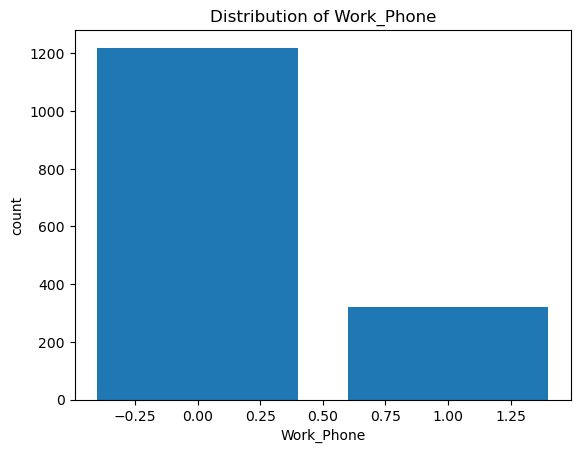

In [36]:
# count number of Work_Phone
Work_Phone_count=df['Work_Phone'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Work_Phone_count.index,Work_Phone_count.values)
plt.xlabel('Work_Phone')
plt.ylabel('count')
plt.title('Distribution of Work_Phone')
plt.show()

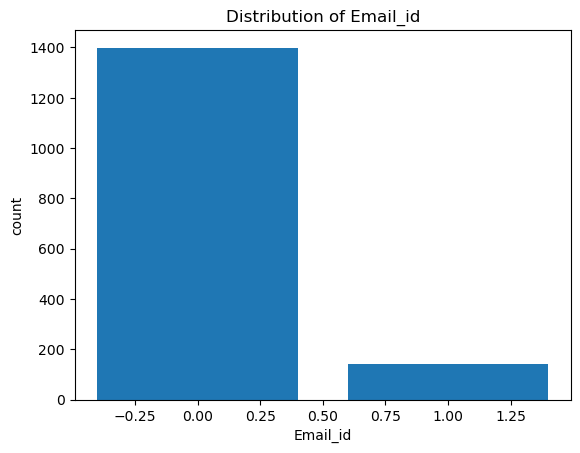

In [37]:
# count number of Email_id
Email_id_count=df['Email_id'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Email_id_count.index,Email_id_count.values)
plt.xlabel('Email_id')
plt.ylabel('count')
plt.title('Distribution of Email_id')
plt.show()

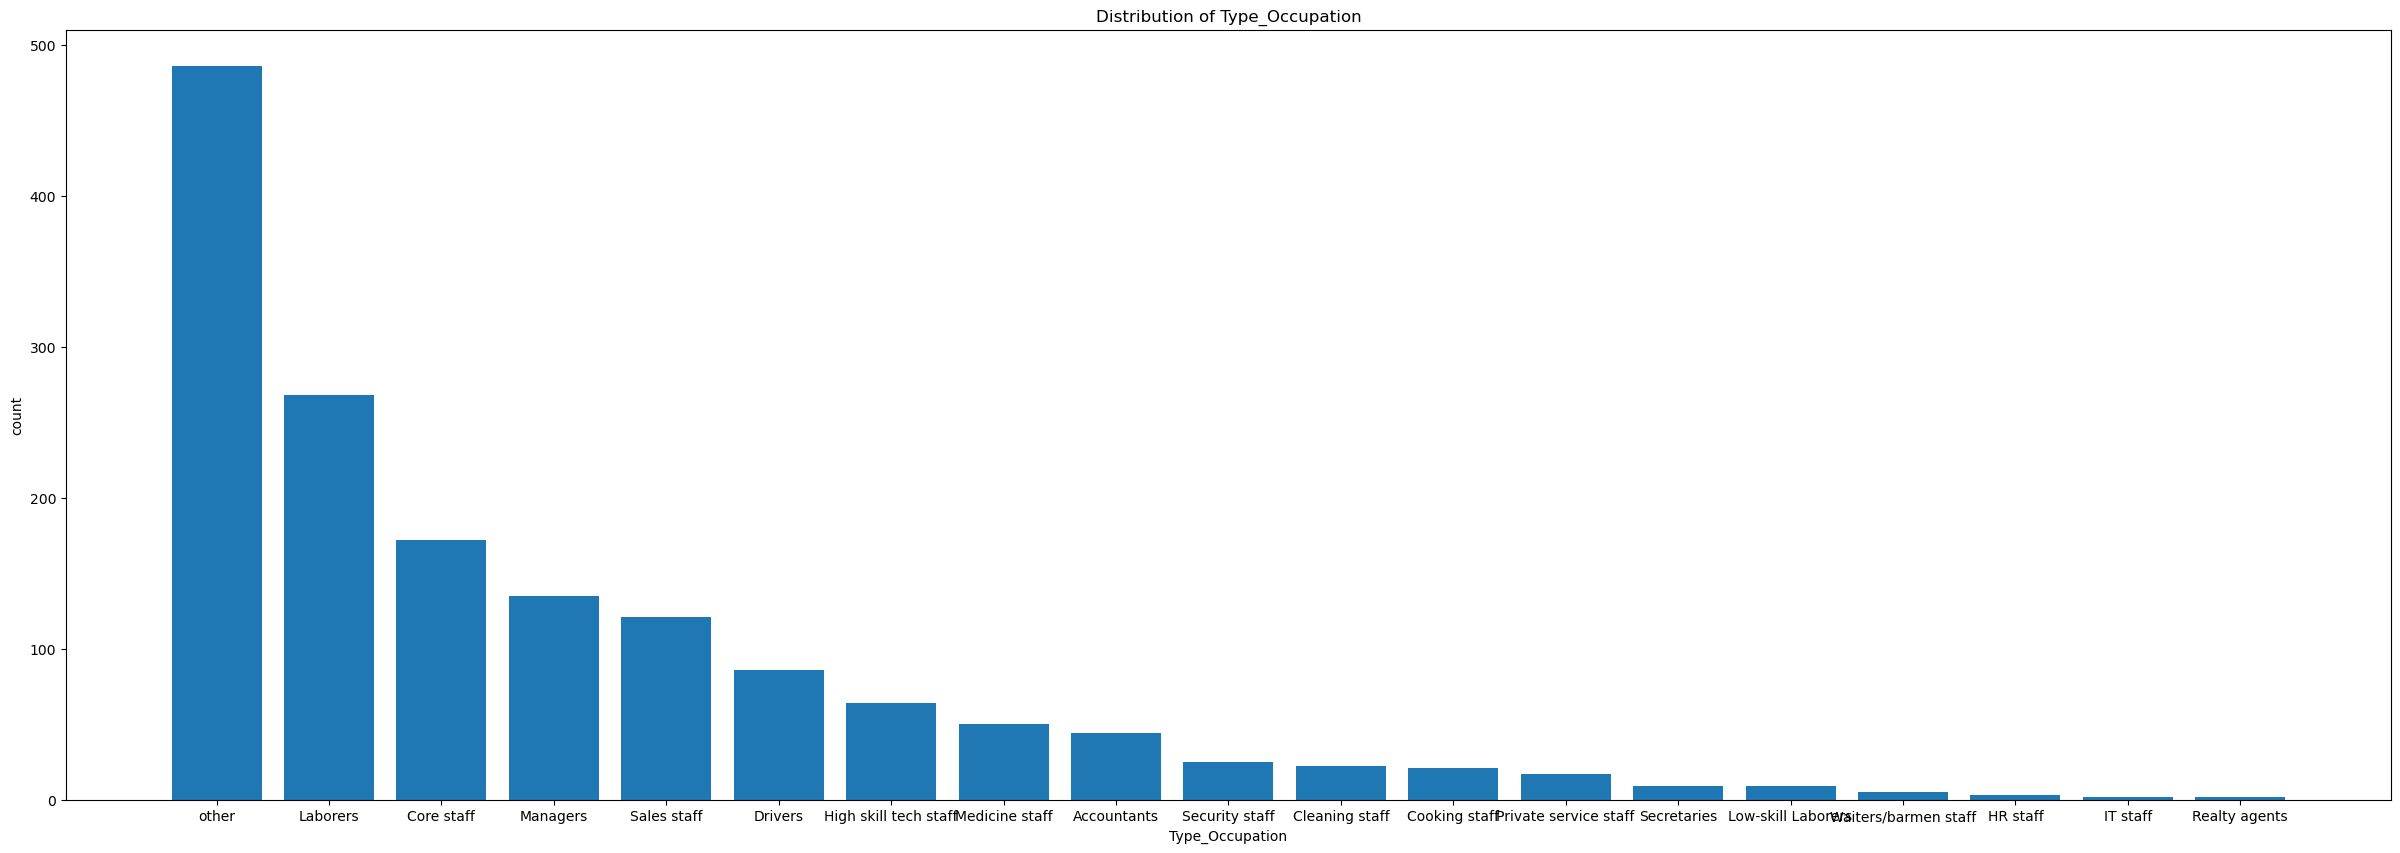

In [38]:
# count number of Type_Occupation
Type_Occupation_count=df['Type_Occupation'].value_counts()
#creat barpolt using Matplotlib
plt.figure(figsize=(30,10))
plt.bar(Type_Occupation_count.index,Type_Occupation_count.values)
plt.xlabel('Type_Occupation')
plt.ylabel('count')
plt.title('Distribution of Type_Occupation')
plt.show()

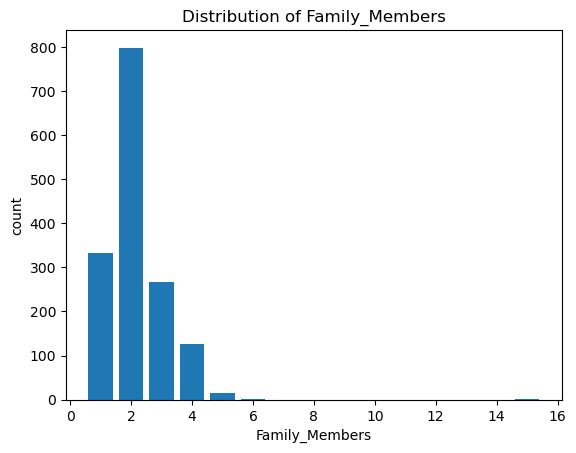

In [39]:
# count number of Family_Members
Family_Members_count=df['Family_Members'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Family_Members_count.index,Family_Members_count.values)
plt.xlabel('Family_Members')
plt.ylabel('count')
plt.title('Distribution of Family_Members')
plt.show()

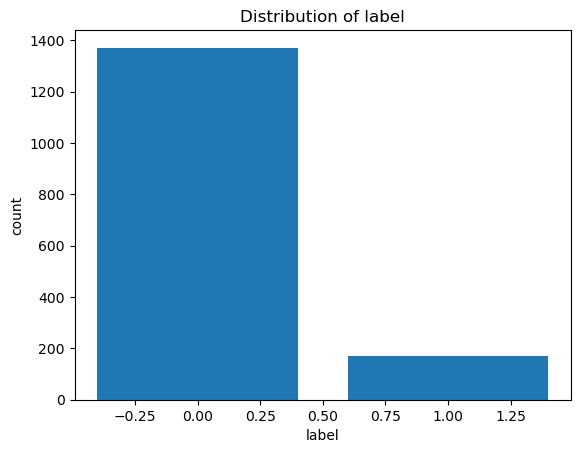

In [40]:
# count number of label
label_count=df['label'].value_counts()
#creat barpolt using Matplotlib
plt.bar(label_count.index,label_count.values)
plt.xlabel('label')
plt.ylabel('count')
plt.title('Distribution of label')
plt.show()

In [41]:
    # Find out the correlation between variables using spearman rank correlation 
    df1 = df[['Ind_id','Children','Annual_income','Age','Employed_exp','Mobile_phone','Work_Phone','Work_Phone','Phone','Email_id','Family_Members','label']].corr(method='spearman')
    df1

,Ind_id,Children,Annual_income,Age,Employed_exp,Mobile_phone,Work_Phone,Work_Phone,Phone,Email_id,Family_Members,label
Ind_id,1.000000,0.026155,-0.011117,-0.023564,0.025145,NaN,0.088004,0.088004,0.007702,-0.044812,0.007507,0.016660
Children,0.026155,1.000000,0.064120,-0.336771,0.156326,NaN,0.040402,0.040402,0.014571,0.055700,0.814514,-0.014037
Annual_income,-0.011117,0.064120,1.000000,-0.106760,0.165777,NaN,-0.069633,-0.069633,-0.020205,0.116949,0.039158,-0.000154
Age,-0.023564,-0.336771,-0.106760,1.000000,-0.195991,NaN,-0.164662,-0.164662,0.036688,-0.161943,-0.276376,0.048210
Employed_exp,0.025145,0.156326,0.165777,-0.195991,1.000000,NaN,0.159235,0.159235,0.008315,-0.004001,0.182474,-0.100412
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.088004,0.040402,-0.069633,-0.164662,0.159235,NaN,1.000000,1.000000,0.353164,-0.008726,0.086653,-0.007203
Work_Phone,0.088004,0.040402,-0.069633,-0.164662,0.159235,NaN,1.000000,1.000000,0.353164,-0.008726,0.086653,-0.007203
Phone,0.007702,0.014571,-0.020205,0.036688,0.008315,NaN,0.353164,0.353164,1.000000,0.015692,0.019702,-0.001799
Email_id,-0.044812,0.055700,0.116949,-0.161943,-0.004001,NaN,-0.008726,-0.008726,0.015692,1.000000,0.054068,0.009560


<Axes: >

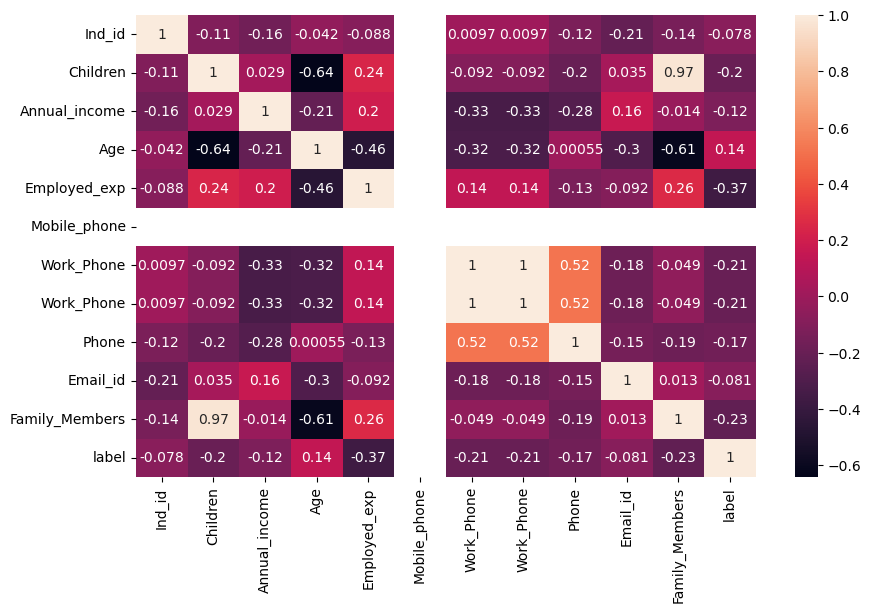

In [42]:
   #Visualization of correlation using Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True)

the calculation of the correlation matrix (df1) is performed using Spearman rank correlation, which is a non-parametric measure of correlation based on the ranks of data values. This can be particularly useful when dealing with ordinal or non-normally distributed data.

# Visualizing the relationships between variables

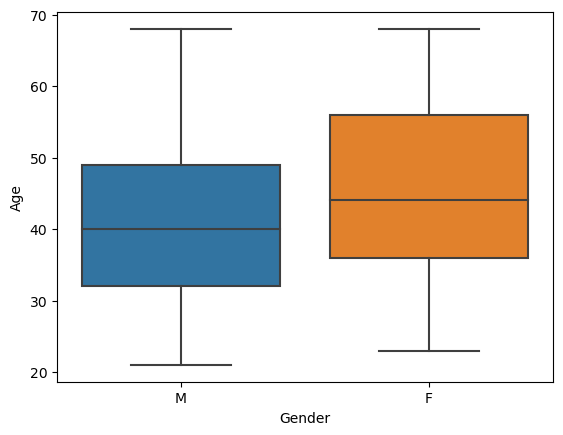

In [43]:
# Visualize the distribution gender of Age
sns.boxplot(x ='Gender',y ="Age",data=df)
plt.show()

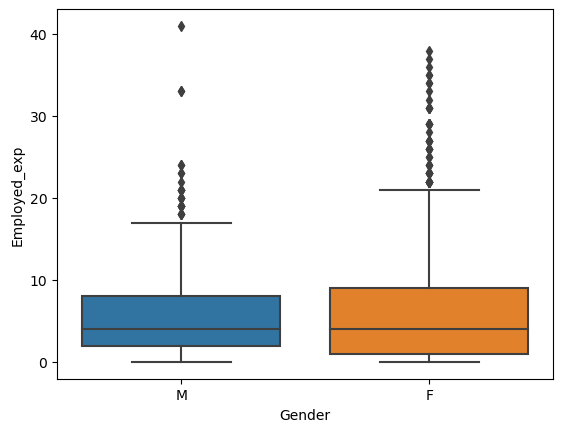

In [44]:
# Visualize the distribution gender of Employed_exp
sns.boxplot(x ='Gender',y ="Employed_exp",data=df)
plt.show()

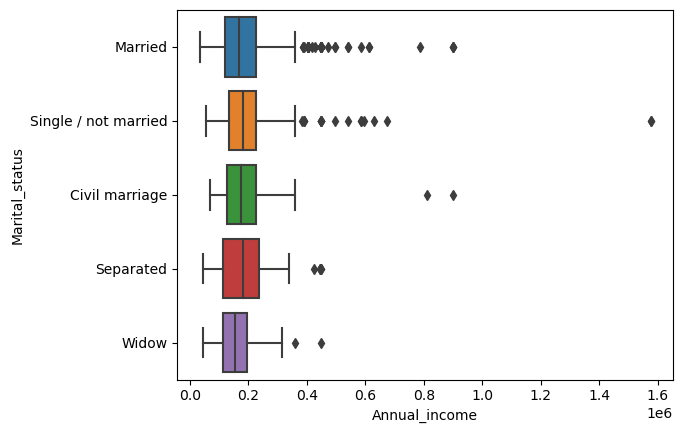

In [45]:
# Visualize the distribution Annual_income of Marital_status
sns.boxplot(x ='Annual_income',y ="Marital_status",data=df)
plt.show()

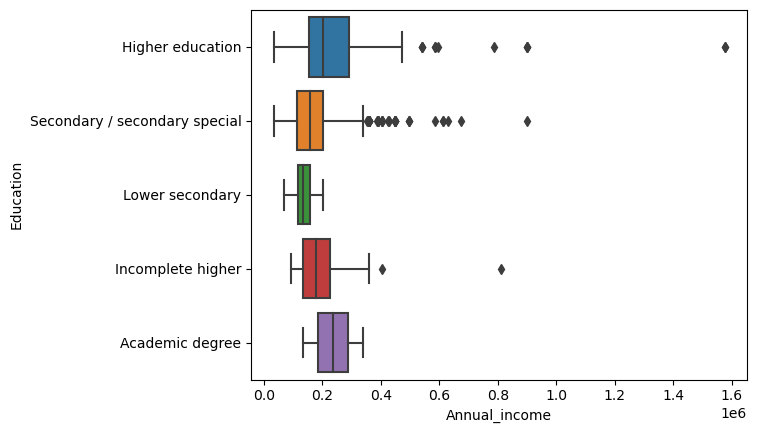

In [46]:
# Visualize the distribution Annual_income of Education
sns.boxplot(x ='Annual_income',y ="Education",data=df)
plt.show()

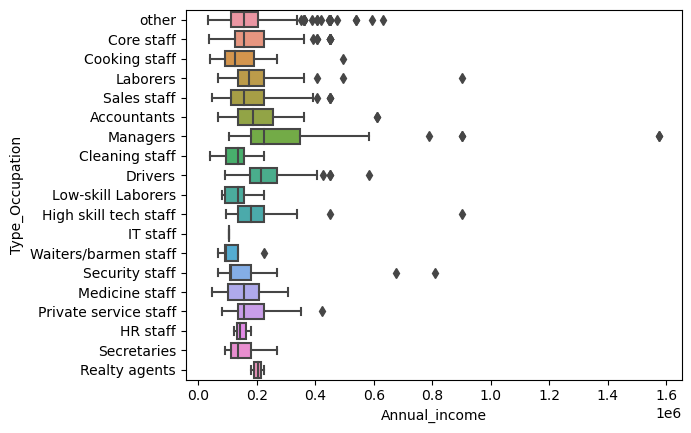

In [47]:
# Visualize the distribution Annual_income of Type_Occupation
sns.boxplot(x ='Annual_income',y ="Type_Occupation",data=df)
plt.show()

t-tests for numeric variables (e.g., Annual Income) and chi-square tests for categorical variables
(e.g., Gender). It compares groups '0' and '1' in the DataFrame, printing relevant statistics and interpretations,
aiding in understanding significant differences between approved and rejected credit card applications

In [48]:
# hypothesis testing
# T-test (Annual_income-independent & label-dependent)
# chi-square
# correlation

<Axes: >

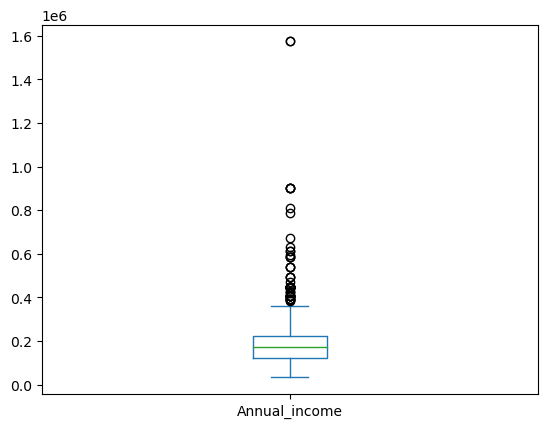

In [49]:
# handling outliers.
df["Annual_income"].plot(kind="box")


In [50]:
# creating a copy of original DataFrame
df_outlier=df.copy()

In [51]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_outlier["Annual_income"].describe()

count      1541.00
mean     190805.75
std      112113.64
min       33750.00
25%      121500.00
50%      171000.00
75%      225000.00
max     1575000.00
Name: Annual_income, dtype: float64

In [52]:
# lower limit= q1-1.5*IQR
# upper limit=q3+1.5*IQR
q1=df_outlier.describe()["Annual_income"]["25%"]
print(q1)
q3=df_outlier.describe()["Annual_income"]["75%"]
print(q3) 

121500.0
225000.0


In [53]:
# IQR=q3-q1
IQR=q3-q1
print(IQR)

103500.0


In [54]:
lower_limit= q1-1.5*IQR
upper_limit=q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-33750.0
380250.0


In [55]:
df_outlier["Annual_income"]=df_outlier["Annual_income"].clip(lower_limit,upper_limit)

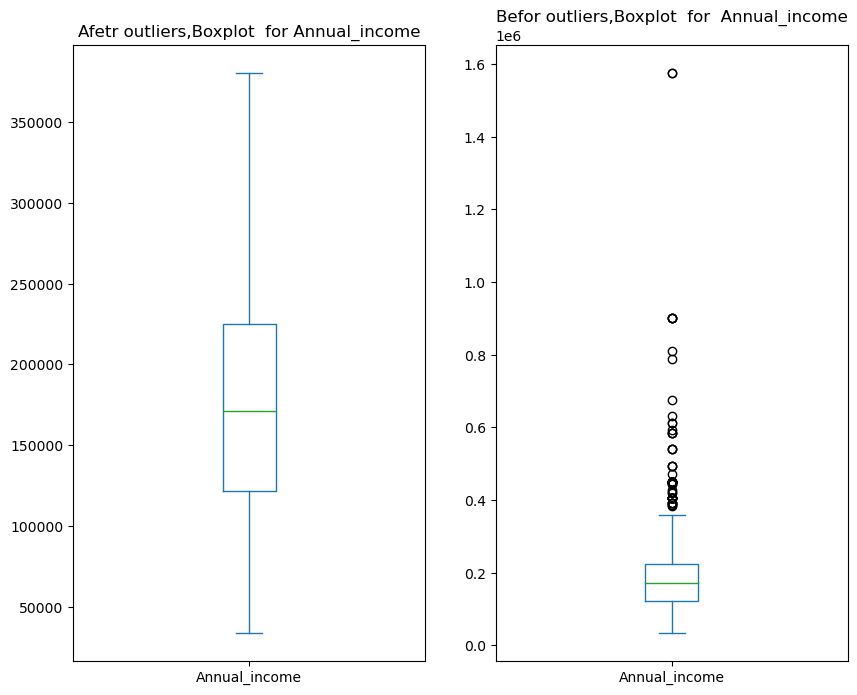

In [56]:
# First panel is a after performing outliers, 2 panel is before outliers
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# ploting the boxplot
df_outlier["Annual_income"].plot(kind="box")
plt.title('Afetr outliers,Boxplot  for Annual_income')
plt.subplot(1,2,2)
df["Annual_income"].plot(kind="box")
plt.title('Befor outliers,Boxplot  for  Annual_income')
plt.show()

In [57]:
# capping original data frame's age column
df["Annual_income"]=df["Annual_income"].clip(lower_limit,upper_limit)

In [58]:
# No of values in children
df_outlier['Children'].value_counts()

0     1086
1      303
2      134
3       16
4        1
14       1
Name: Children, dtype: int64

Text(0.5, 1.0, 'Befor outliers,Boxplot  for No of Children')

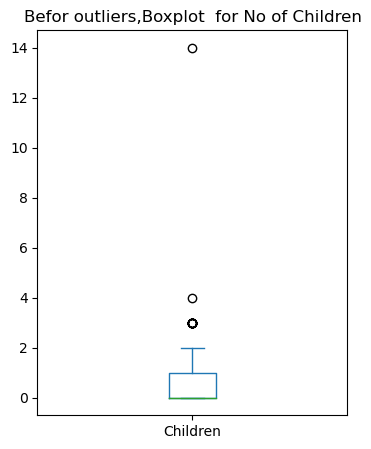

In [59]:
# outliers performing
plt.figure(figsize=(4,5))
df_outlier['Children'].plot(kind='box')
plt.title('Befor outliers,Boxplot  for No of Children')

In [60]:
#statistical analysis
df_outlier['Children'].describe()

count   1541.00
mean       0.41
std        0.78
min        0.00
25%        0.00
50%        0.00
75%        1.00
max       14.00
Name: Children, dtype: float64

In [61]:
# lower limit= q1-1.5*IQR
# upper limit=q3+1.5*IQR
q1=df_outlier.describe()["Children"]["25%"]
print(q1)
q3=df_outlier.describe()["Children"]["75%"]
print(q3) 

0.0
1.0


In [62]:
# IQR=q3-q1
IQR=q3-q1
print(IQR)
print(IQR)

1.0
1.0


In [63]:
lower_limit= q1-1.5*IQR
upper_limit=q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-1.5
2.5


In [64]:
df_outlier["Children"]=df_outlier["Children"].clip(lower_limit,upper_limit)

Text(0.5, 1.0, 'Befor outliers,Boxplot  for  Children')

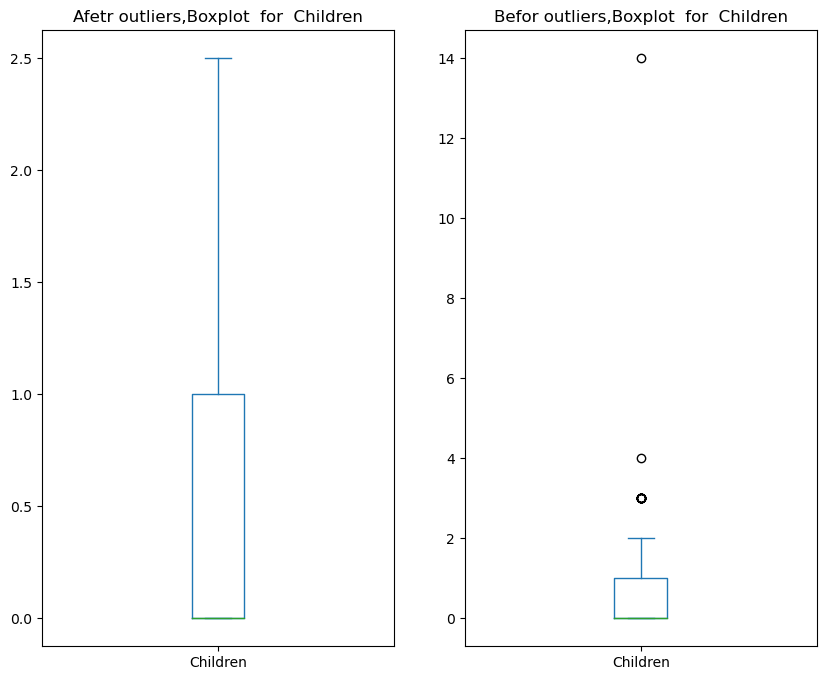

In [65]:
# First panel is a after performing outliers, 2 panel is before outliers
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# ploting the boxplot
df_outlier["Children"].plot(kind="box")
plt.title('Afetr outliers,Boxplot  for  Children')
plt.subplot(1,2,2)
df["Children"].plot(kind="box")
plt.title('Befor outliers,Boxplot  for  Children')

In [66]:
# capping original data frame's age column
df["Children"]=df["Children"].clip(lower_limit,upper_limit)

In [67]:
#statistical analysis
df_outlier['Employed_exp'].describe()

count   1541.00
mean       6.08
std        6.60
min        0.00
25%        1.00
50%        4.00
75%        9.00
max       41.00
Name: Employed_exp, dtype: float64

Text(0.5, 1.0, 'Before outliers,Employed_exp')

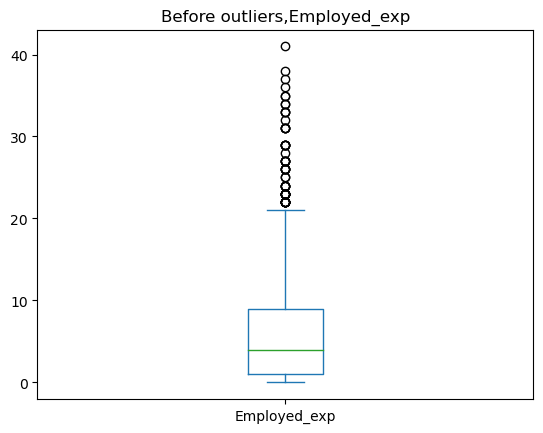

In [68]:
df_outlier['Employed_exp'].plot(kind='box')
plt.title('Before outliers,Employed_exp')

In [69]:
# lower limit= q1-1.5*IQR
# upper limit=q3+1.5*IQR
q1=df_outlier.describe()["Employed_exp"]["25%"]
print(q1)
q3=df_outlier.describe()["Employed_exp"]["75%"]
print(q3) 

1.0
9.0


In [70]:
df_outlier["Employed_exp"]=df_outlier["Employed_exp"].clip(lower_limit,upper_limit)

Text(0.5, 1.0, 'Befor outliers,Boxplot  for  Employed_exp')

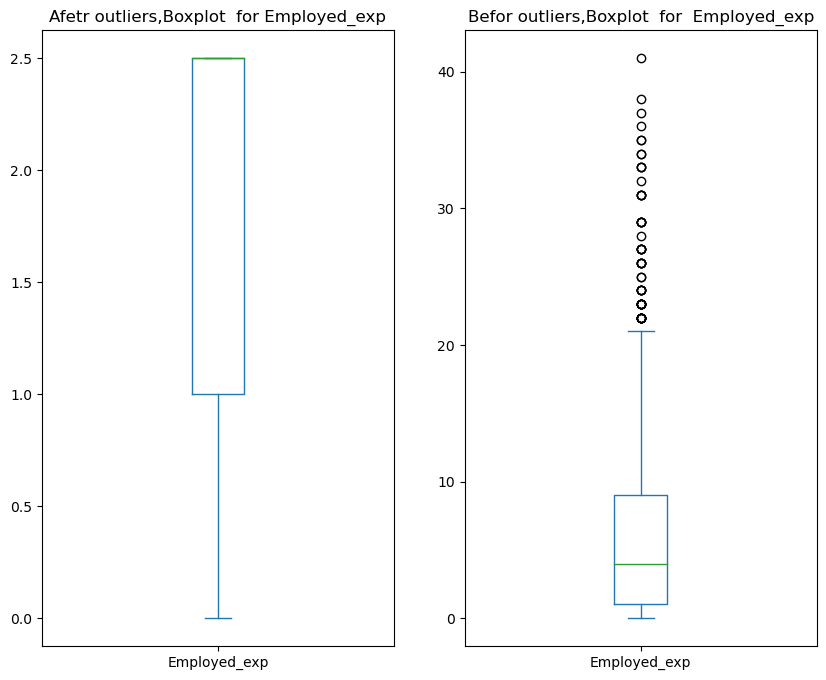

In [71]:
# First panel is a after performing outliers, 2 panel is before outliers
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# ploting the boxplot
df_outlier["Employed_exp"].plot(kind="box")
plt.title('Afetr outliers,Boxplot  for Employed_exp')
plt.subplot(1,2,2)
df["Employed_exp"].plot(kind="box")
plt.title('Befor outliers,Boxplot  for  Employed_exp')

In [72]:
# capping original data frame's age column
df["Employed_exp"]=df["Employed_exp"].clip(lower_limit,upper_limit)

In [73]:
df.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0.00,180000.00,Pensioner,Higher education,Married,House / apartment,51.00,0.00,1,0,0,0,other,2,1
1,5009744,F,Y,N,0.00,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,2.00,1,1,1,0,other,2,1
2,5009746,F,Y,N,0.00,315000.00,Commercial associate,Higher education,Married,House / apartment,44.00,2.00,1,1,1,0,other,2,1
3,5009749,F,Y,N,0.00,191399.33,Commercial associate,Higher education,Married,House / apartment,37.00,2.00,1,1,1,0,other,2,1
4,5009752,F,Y,N,0.00,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,2.00,1,1,1,0,other,2,1


Text(0.5, 1.0, 'Distribution of Annual Income for Approved and Rejected Applications')

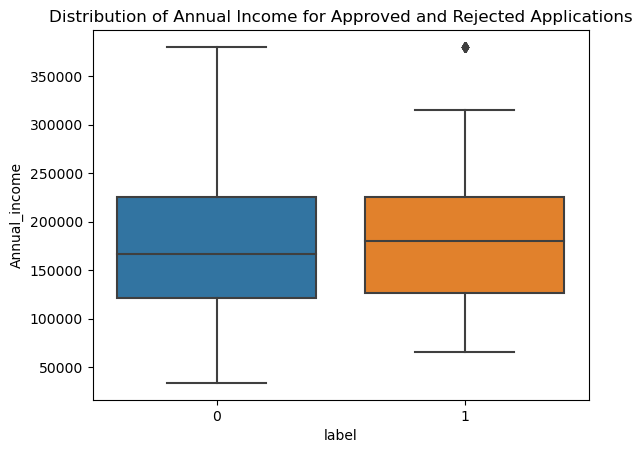

In [74]:
# Box plot,  0 is approved credit card, 1 is not approved credit card
sns.boxplot(x='label', y='Annual_income', data=df)
plt.title('Distribution of Annual Income for Approved and Rejected Applications')

In [75]:
from scipy.stats import ttest_ind
Approved=df[df['label']==0]['Annual_income']
Rejected=df[df['label']==1]['Annual_income']
ttest,p_value=ttest_ind(Approved,Rejected)
print('T-statistical_value:',ttest)
print('p_value:', p_value)

if p_value < 0.05:
    print('There is no significant difference in the annual income between approved and rejected credit card applications')
else:
    print('There is a significant difference in the annual income between approved and rejected credit card applications')



T-statistical_value: -0.40448925535892194
p_value: 0.685909184180285
There is a significant difference in the annual income between approved and rejected credit card applications


If the p-value is less than 0.05, it suggests that there is a significant difference in annual income between the two groups,If the p-value is greater than or equal to 0.05, it suggests that there is no significant difference in annual income between approved and rejected credit card applications based on the t-test.

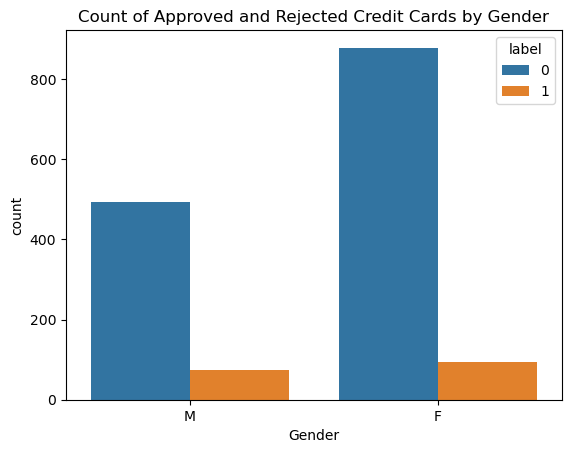

In [76]:
#  'label' is the column indicating approval status (0 or 1) and 'Gender' is the gender column
sns.countplot(x='Gender', hue='label', data=df)
# ploting the title  Approved or rejected
plt.title('Count of Approved and Rejected Credit Cards by Gender')
plt.show()

In [77]:
# chi_square test
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['label'])

# Performing the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

#  chi-square statistic and p-value
print("\nChi-square Statistic:", chi2)
print("P-value:", p_value)

# Determine significance
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis. ")


Chi-square Statistic: 3.982162865583862
P-value: 0.04598448082256474
Reject the null hypothesis.


If the p-value is less than 0.05, it suggests that there is evidence to reject the null hypothesis,if the p-value is greater than or equal to 0.05, it suggests that there is not enough evidence to reject the null hypothesis, and no significant association between 'Gender' and 'label' is found based on the chi-square test

In [78]:
df.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0.00,180000.00,Pensioner,Higher education,Married,House / apartment,51.00,0.00,1,0,0,0,other,2,1
1,5009744,F,Y,N,0.00,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,2.00,1,1,1,0,other,2,1
2,5009746,F,Y,N,0.00,315000.00,Commercial associate,Higher education,Married,House / apartment,44.00,2.00,1,1,1,0,other,2,1
3,5009749,F,Y,N,0.00,191399.33,Commercial associate,Higher education,Married,House / apartment,37.00,2.00,1,1,1,0,other,2,1
4,5009752,F,Y,N,0.00,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,2.00,1,1,1,0,other,2,1


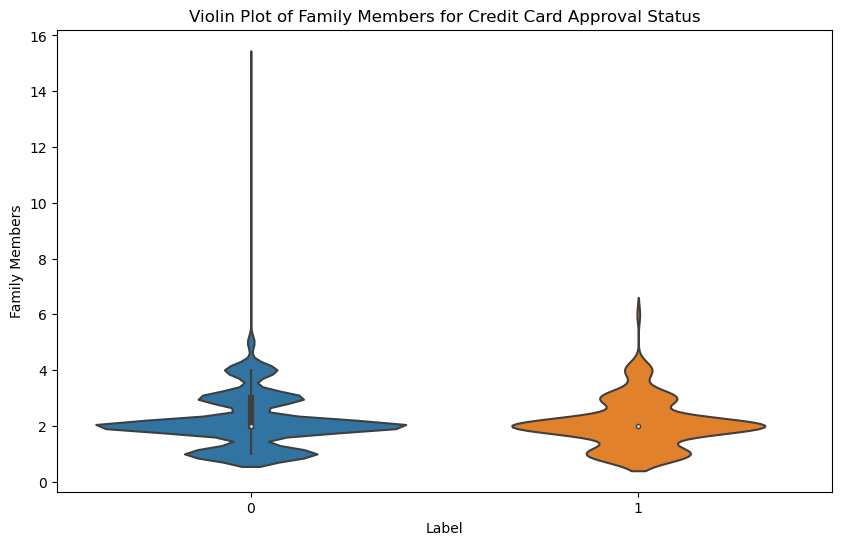

In [79]:
# ploting the Family_Members approvals and rejected
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='Family_Members', data=df)
# title for the Family members for credit card status
plt.title('Violin Plot of Family Members for Credit Card Approval Status')
# xlabel
plt.xlabel('Label')
#ylabel
plt.ylabel('Family Members')
plt.show()

In [80]:
from scipy.stats import pearsonr


#  'Family member' and 'label' with your actual column names
point_pearsonr_corr, p_value = pearsonr(df['Family_Members'], df['label'])

# Print the point-biserial correlation coefficient and p-value
print("Point-Biserial Correlation Coefficient:", point_pearsonr_corr)
print("P-value:", p_value)

# Determine significance
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis. ")

Point-Biserial Correlation Coefficient: -0.029665218488764813
P-value: 0.24449035596621393
Fail to reject the null hypothesis. 


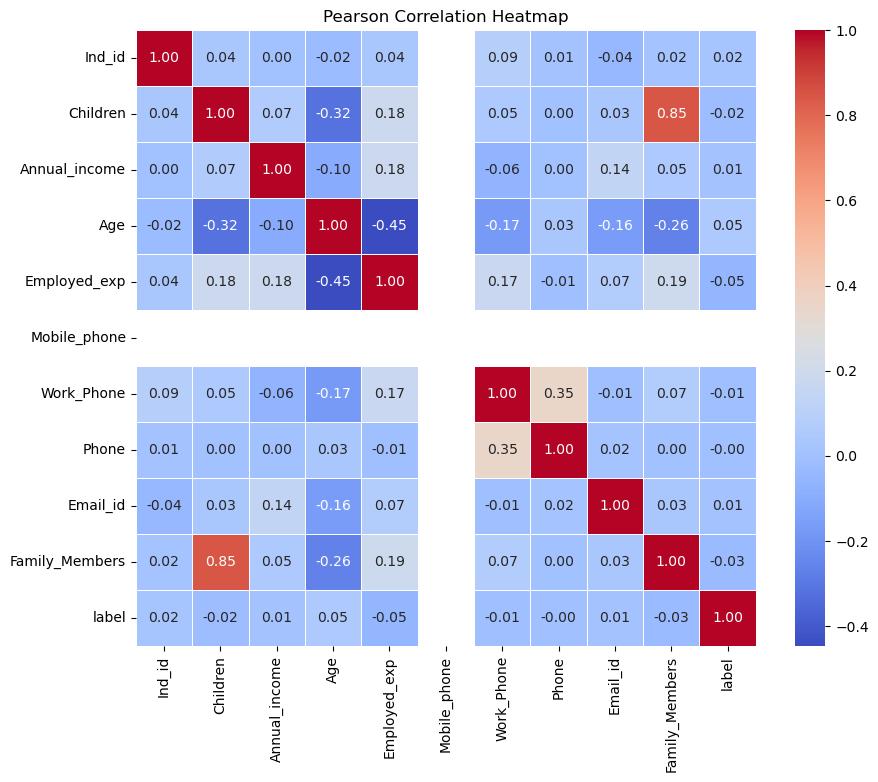

In [81]:
# selecting only the numerical columns for DataFrame
numerical_variables = df.select_dtypes(include=['float64', 'int64'])

# Calculated Pearson correlation matrix
correlation_matrix = numerical_variables.corr()

# Created a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

If the p-value is less than 0.05, it suggests that there is a significant correlation between Family_Members and label.
If the p-value is greater than or equal to 0.05, it suggests that there is not enough evidence to reject the null hypothesis, and no significant correlation is found.

In [82]:
# removing unused columns
df = df.drop(['Ind_id', 'Mobile_phone','Work_Phone','Phone','Email_id'], axis=1)

In [83]:
df.head()

,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Type_Occupation,Family_Members,label
0,M,Y,Y,0.00,180000.00,Pensioner,Higher education,Married,House / apartment,51.00,0.00,other,2,1
1,F,Y,N,0.00,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,2.00,other,2,1
2,F,Y,N,0.00,315000.00,Commercial associate,Higher education,Married,House / apartment,44.00,2.00,other,2,1
3,F,Y,N,0.00,191399.33,Commercial associate,Higher education,Married,House / apartment,37.00,2.00,other,2,1
4,F,Y,N,0.00,315000.00,Commercial associate,Higher education,Married,House / apartment,37.00,2.00,other,2,1


In [84]:
df.shape

(1541, 14)

# Feature Engineering

In [85]:
# converting non numeric to numeric for train and test data
#Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [86]:
df.info() # after perfromning all the categorical converted to numeric data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1541 non-null   int32  
 1   Car_Owner        1541 non-null   int32  
 2   Propert_Owner    1541 non-null   int32  
 3   Children         1541 non-null   float64
 4   Annual_income    1541 non-null   float64
 5   Type_Income      1541 non-null   int32  
 6   Education        1541 non-null   int32  
 7   Marital_status   1541 non-null   int32  
 8   Housing_type     1541 non-null   int32  
 9   Age              1541 non-null   float64
 10  Employed_exp     1541 non-null   float64
 11  Type_Occupation  1541 non-null   int32  
 12  Family_Members   1541 non-null   int64  
 13  label            1541 non-null   int64  
dtypes: float64(4), int32(8), int64(2)
memory usage: 120.5 KB


In [87]:
df.shape # shape cols & rows

(1541, 14)

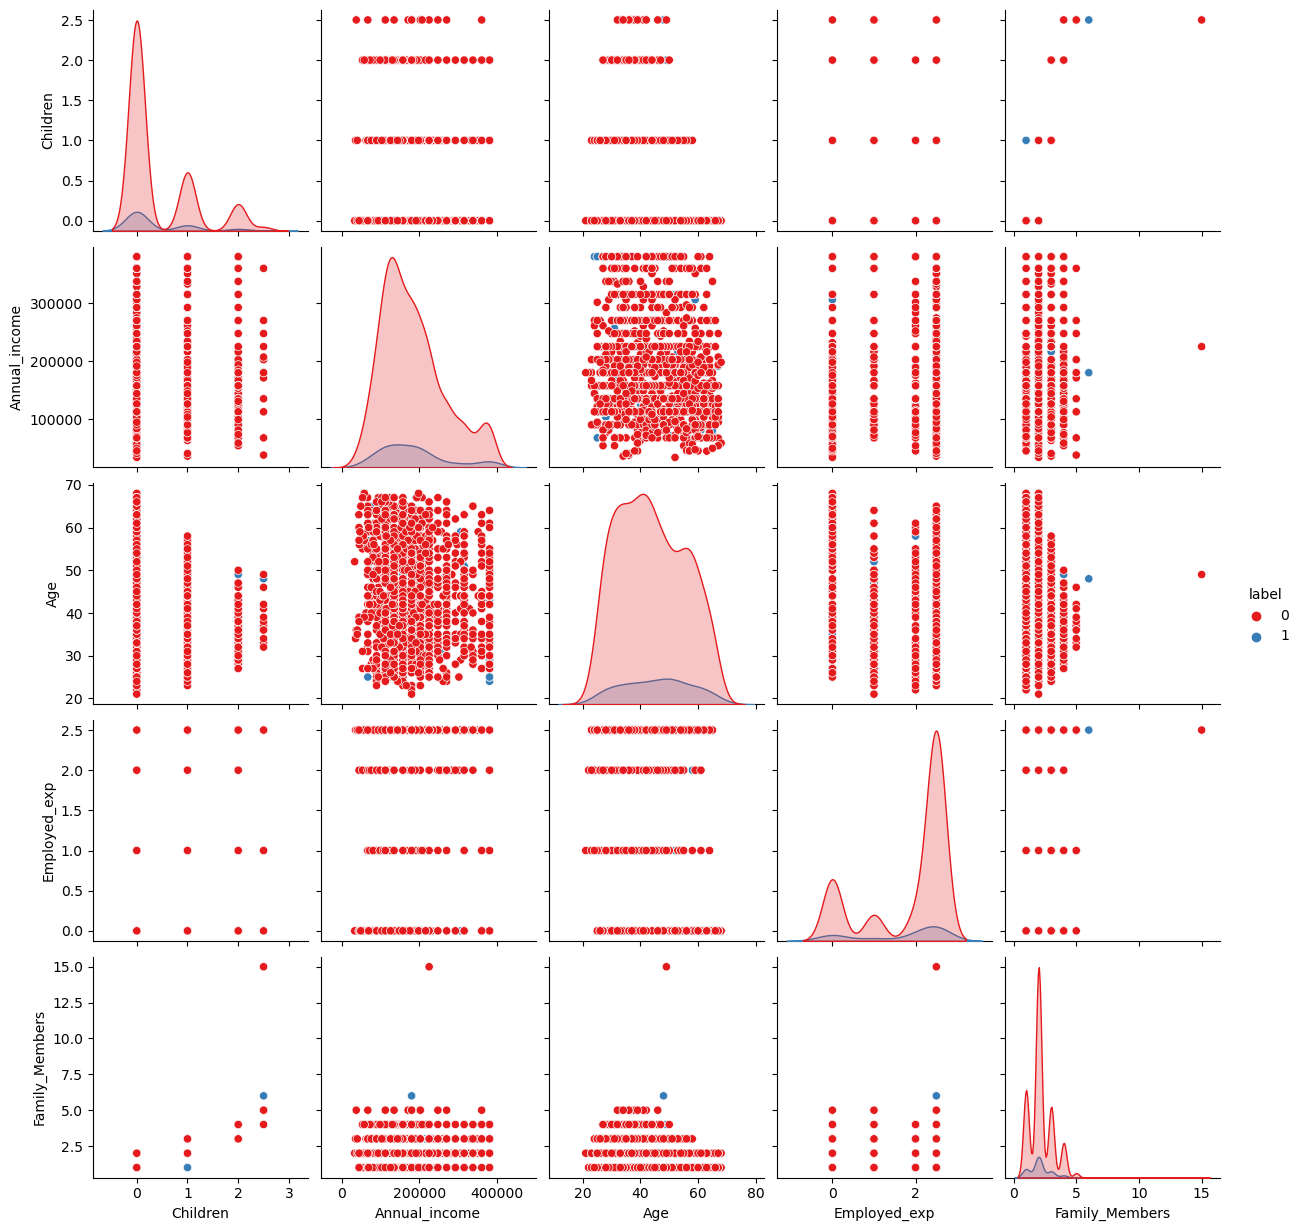

In [88]:
numerical_variables = df.select_dtypes(include=['float64', 'int64'])

# 'label' column to the numerical variables DataFrame
numerical_variables['label'] = df['label']

# Creating a pair plot with the 'Set1' Seaborn palette
sns.pairplot(numerical_variables, hue='label', palette='Set1')
plt.show()

the pair plot is a visual exploration of relationships between numerical variables, and the color differentiation helps identify patterns or trends based on the 'label' column

# Model Building

In [89]:
# feature scaling
from sklearn.model_selection import train_test_split
# split the data into train and test
x = df.iloc[:,0:-1] #df2.drop['columns', drop_first=True]
y = df.iloc[:,-1]  # df2['columns']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [90]:
# X_train # 80%, x_test=20%
#y_train= 80%, y_test=20%
x_train


,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Type_Occupation,Family_Members
540,1,1,0,0.00,225000.00,3,4,1,1,30.00,2.50,18,2
243,0,0,1,0.00,157500.00,3,4,3,1,30.00,2.50,15,1
1159,0,0,0,2.00,112500.00,3,4,1,1,43.00,2.50,8,4
401,1,1,0,0.00,157500.00,3,2,1,5,25.00,2.50,4,2
1454,1,1,0,0.00,337500.00,3,4,1,1,40.00,2.50,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,1,1,0.00,270000.00,3,4,2,1,46.00,1.00,18,1
835,0,1,1,0.00,148500.00,0,4,1,3,47.00,2.50,3,2
1216,0,0,1,0.00,112500.00,3,4,1,1,64.00,1.00,18,2
559,1,0,1,0.00,157500.00,3,4,1,1,26.00,2.50,8,2


In [91]:
y_train

540     0
243     0
1159    0
401     0
1454    0
       ..
763     0
835     0
1216    0
559     0
684     0
Name: label, Length: 1078, dtype: int64

In [92]:
x_test

,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Type_Occupation,Family_Members
893,0,0,0,1.00,225000.00,0,4,1,1,29.00,2.50,13,3
993,0,0,1,0.00,157500.00,2,1,2,1,57.00,2.50,18,1
983,0,0,1,1.00,270000.00,3,4,1,1,57.00,2.50,3,3
1491,0,0,1,1.00,135000.00,3,0,0,1,48.00,2.50,18,3
1507,0,0,0,0.00,69750.00,1,4,4,2,60.00,0.00,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,1,1,0,0.00,270000.00,3,2,1,1,33.00,2.00,8,2
240,0,0,0,0.00,292500.00,2,4,1,1,57.00,2.50,0,2
1279,1,1,0,0.00,292500.00,0,1,3,1,38.00,2.50,8,1
679,1,1,1,2.00,380250.00,0,1,1,1,27.00,2.50,10,4


In [93]:
x_train

,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Type_Occupation,Family_Members
540,1,1,0,0.00,225000.00,3,4,1,1,30.00,2.50,18,2
243,0,0,1,0.00,157500.00,3,4,3,1,30.00,2.50,15,1
1159,0,0,0,2.00,112500.00,3,4,1,1,43.00,2.50,8,4
401,1,1,0,0.00,157500.00,3,2,1,5,25.00,2.50,4,2
1454,1,1,0,0.00,337500.00,3,4,1,1,40.00,2.50,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,1,1,0.00,270000.00,3,4,2,1,46.00,1.00,18,1
835,0,1,1,0.00,148500.00,0,4,1,3,47.00,2.50,3,2
1216,0,0,1,0.00,112500.00,3,4,1,1,64.00,1.00,18,2
559,1,0,1,0.00,157500.00,3,4,1,1,26.00,2.50,8,2


In [94]:
# count the number rows and columns for x_test
x_test.shape

(463, 13)

In [95]:
# count the number rows and columns for x_train
x_train.shape

(1078, 13)

In [96]:
# count the number rows for y_test
y_test.shape

(463,)

In [97]:
# count the number rows for y_train
y_train.shape

(1078,)

In [98]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

 SMOTE generates synthetic samples for the minority class to balance the class distribution. This can potentially improve the model's ability to generalize and make accurate predictions for both minority and majority classes in the target variable

# Scaling

In [99]:
# importing the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(x_test)


# Applying ML algorithm 

In [100]:
# importing the LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train_scaled, y_train_resampled)

LogisticRegression(random_state=0)

In [101]:
# evaluate the trained mode
y_pred_logreg = logreg.predict(X_test_scaled)


In [102]:
df['label'].value_counts() # almost balanced data

0    1371
1     170
Name: label, dtype: int64

In [103]:
# metrics- confusion matrix, precision recall, accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, f1_score

conf_matrix = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[311 103]
 [ 41   8]]


In [104]:
print('accuracy_score:',accuracy_score(y_test,y_pred_logreg) * 100)


accuracy_score: 68.89848812095032


In [105]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg,zero_division=1))



Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81       414
           1       0.07      0.16      0.10        49

    accuracy                           0.69       463
   macro avg       0.48      0.46      0.46       463
weighted avg       0.80      0.69      0.74       463



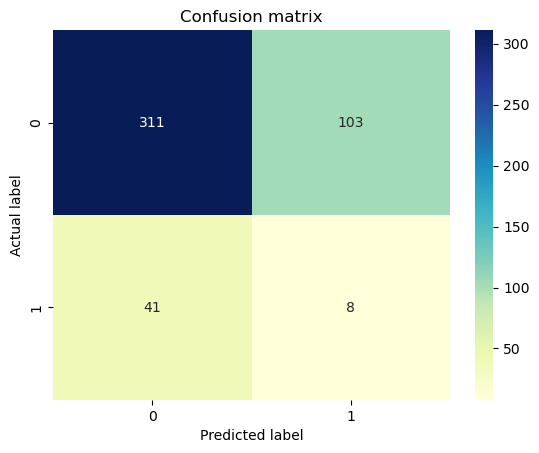

In [106]:
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

True Positive – Predicted value is positive and equal to actual positive value
True Negative - Predicted value is negative and equal to actual negative value
False Positive (Type 1 Error) – Predicted as positive and actual value is not positive
False Negative (Type 2 Error) - Predicted as negative and actual value is not negative.

the code generates a heatmap visualization of a confusion matrix, making it easier to interpret the performance of a classification model by comparing predicted and actual class labels. The color intensity represents the number of instances for each combination of predicted and actual classes.

# Random Forest

In [107]:
# RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train) # training the model

RandomForestClassifier(random_state=0)

In [108]:
# evaluation
y_pred_rf=rf.predict(x_test)


In [109]:
print('accuracy_score:',accuracy_score(y_test,y_pred_rf))

accuracy_score: 0.9049676025917927


In [110]:
# classification_report precision    recall  f1-score   support
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf,zero_division=1))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       414
           1       0.65      0.22      0.33        49

    accuracy                           0.90       463
   macro avg       0.78      0.60      0.64       463
weighted avg       0.89      0.90      0.88       463



# cross validation

In [111]:
# cross validation RandomForestClassifier
from sklearn.model_selection import cross_val_score
results=cross_val_score(rf,x,y,cv=5)
print(results)
print(np.mean(results))

# this is the best accuracy compare to other's 0.9275080906148865

[0.88996764 0.88636364 0.88636364 0.87987013 0.88311688]
0.8851363846509477


In [112]:
# cross validation technique 
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(rf,x,y,scoring='accuracy', cv=5)

In [113]:
cross_val # cross validate giving 88% accuracy  model

array([0.88996764, 0.88636364, 0.88636364, 0.87987013, 0.88311688])

# DecisionTree

In [114]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the model on the training data
decision_tree_classifier.fit(x_train, y_train)



DecisionTreeClassifier(random_state=0)

In [115]:
# Predict on the test data
y_pred_decision_tree = decision_tree_classifier.predict(x_test)


In [116]:
# cross validation helps us to checks similar accuracy result for  decision_tree
from sklearn.model_selection import cross_val_score
results=cross_val_score(decision_tree_classifier,x,y,cv=5)
print(results)
print(np.mean(results))

[0.83495146 0.83441558 0.83116883 0.82467532 0.85714286]
0.8364708107426553


In [117]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred_decision_tree,zero_division=1))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       414
           1       0.27      0.31      0.29        49

    accuracy                           0.84       463
   macro avg       0.59      0.60      0.60       463
weighted avg       0.85      0.84      0.84       463



# XG boost

In [118]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [119]:
y_pred_xgb=xgb.predict(x_test)


In [120]:
print("xg training set:",xgb.score(x_train, y_train))
print("xg testing set:",xgb.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

xg training set: 0.9925788497217068
xg testing set: 0.9071274298056156
Accuracy: 0.9071274298056156
[[407   7]
 [ 36  13]]


# Crossvalidation

In [121]:
# cross validation helps us to checks similar accuracy result for  xgb
from sklearn.model_selection import cross_val_score
results=cross_val_score(xgb,x,y,cv=5)
print(results)
print(np.mean(results))

[0.88996764 0.87662338 0.87012987 0.86038961 0.87337662]
0.8740974236119868


In [122]:
# classification_report of precision    recall  f1-score   support
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb,zero_division=1))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       414
           1       0.65      0.27      0.38        49

    accuracy                           0.91       463
   macro avg       0.78      0.62      0.66       463
weighted avg       0.89      0.91      0.89       463




Metrics for Logistic Regression:
Accuracy: 0.6889848812095032
Precision: 0.07207207207207207
Recall: 0.16326530612244897
F1 Score: 0.09999999999999999

Metrics for Random Forest:
Accuracy: 0.9049676025917927
Precision: 0.6470588235294118
Recall: 0.22448979591836735
F1 Score: 0.33333333333333337

Metrics for Decision Tree:
Accuracy: 0.8401727861771058
Precision: 0.2727272727272727
Recall: 0.30612244897959184
F1 Score: 0.28846153846153844

Metrics for XGBoost:
Accuracy: 0.9071274298056156
Precision: 0.65
Recall: 0.2653061224489796
F1 Score: 0.3768115942028986


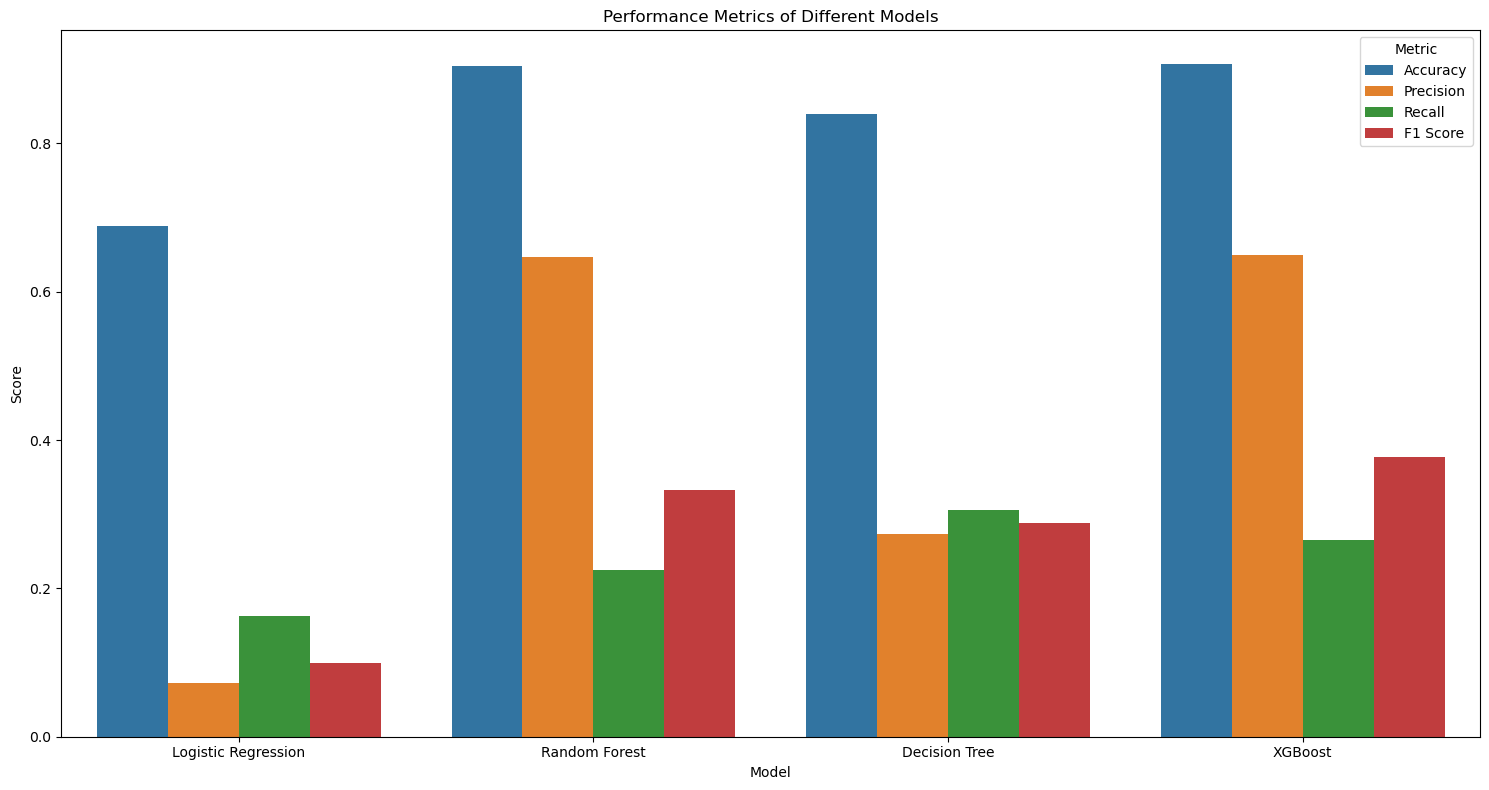

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models and their predictions
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost']
predictions = [y_pred_logreg, y_pred_rf, y_pred_decision_tree, y_pred_xgb]

# Lists to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through each model's predictions
for i, pred in enumerate(predictions):
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred, zero_division=1))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))

    # Print metrics for each model
    print(f"\nMetrics for {models[i]}:")
    print(f"Accuracy: {accuracy_scores[-1]}")
    print(f"Precision: {precision_scores[-1]}")
    print(f"Recall: {recall_scores[-1]}")
    print(f"F1 Score: {f1_scores[-1]}")



# Combined the scores into a single DataFrame for easier plotting
import pandas as pd
metrics_df = pd.DataFrame({
    'Model': models * 4,
    'Metric': ['Accuracy'] * 4 + ['Precision'] * 4 + ['Recall'] * 4 + ['F1 Score'] * 4,
    'Score': accuracy_scores + precision_scores + recall_scores + f1_scores
})

# Plot a single bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df)
plt.title('Performance Metrics of Different Models')
plt.tight_layout()
plt.show()

Hence we got accuracy on different classification

-logisitic regression got accuracy 68%

-DecisionTree got accuracy 84%

-xg boosting got accuracy 91%

-Random Forest got accuracy 90%

we have done all the elementry EDA steps needed and plotted various graphs to determine the correlation among the independent variables and also between the independent and dependent variable.

After feature selection we used four machine learning models and achieved quite good accuracy 90% in Random Forest And 91% xg boosting for predicting the credit card approval.

# Project Overview

* This research is focusing on application of machine learning (ML) techniques to predict
  customer eligibility for a credit card.
* Credit Risk:
  Defined as the potential loss to the bank if a borrower fails to meet obligations.
  Critical in loan decisions to reduce the probability of non-performing assets (NPA).
  There are several manual steps involving when granting a credit card to a customer. Assessing
    applicant’s creditworthiness and checking the eligibility are the key factors and decisions the
    bank would take about a credit worthiness will not always be accurate. Application of machine
    learning techniques can eliminate manual paperwork, time-consuming processes and most
    importantly data driven decision making before granting a credit card to a customer. In this
    research, different supervised machine learning algorithms were used to develop models and
    follow the steps in cross-industry standard process for data mining (CRISP-DM) life cycle.
    Accuracy of models was validated by using different validation techniques.